## 1. Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load Data

**Note**: Place your `train.csv` and `val.csv` files in the `data/` directory.

In [15]:
# Load datasets
train_df = pd.read_csv('../data/train.csv')
val_df = pd.read_csv('../data/val.csv')

print(f"Training set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")
print(f"\nTotal samples: {len(train_df) + len(val_df)}")

Training set shape: (8936, 2)
Validation set shape: (2681, 2)

Total samples: 11617


## 3. Dataset Overview

In [16]:
# Display first few rows
print("Sample Training Data:")
print("=" * 80)
train_df.head(10)

Sample Training Data:


,property_address,categories
0,"New Ppid 1Kqttmg7, House, Property Id No.58C57...",houseorplot
1,"Property Of Rs No.12/2,Plot No. 01,House Numbe...",houseorplot
2,"Flat-504,Floor-5 Shanti Vista-Ii Wing C Bldg 9...",flat
3,"Flat-103,Floor-1 Eshamya Florenza Tower L S No...",flat
4,Flat No G 532 I P Extension Patparganj 2Nd Flo...,flat
5,"R.S. No. 7251/4, Mandal Patia, Opposite Post O...",landparcel
6,Unit No. 81-D11-B-1F In Project Signaturegloba...,flat
7,"Unit-613 Huda S No / Sector 25,Urban Estate Pa...",flat
8,"Unit No 10C Tower-B3, Sector-565 Spaze I Tech ...",flat
9,Flat No 1 Ground Floor Building A Sarita Garde...,flat


In [17]:
# Check data types and info
print("\nDataset Information:")
print("=" * 80)
train_df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   property_address  8936 non-null   object
 1   categories        8936 non-null   object
dtypes: object(2)
memory usage: 139.8+ KB


In [18]:
# Check for missing values
print("\nMissing Values:")
print("=" * 80)
print("\nTraining set:")
print(train_df.isnull().sum())
print("\nValidation set:")
print(val_df.isnull().sum())


Missing Values:

Training set:
property_address    0
categories          0
dtype: int64

Validation set:
property_address    0
categories          0
dtype: int64


## 4. Class Distribution Analysis

**Critical**: Understanding class balance affects model selection and evaluation metrics.

In [19]:
# Category distribution in training set
print("Training Set - Category Distribution:")
print("=" * 80)
train_counts = train_df['categories'].value_counts()
train_pct = train_df['categories'].value_counts(normalize=True) * 100

dist_df = pd.DataFrame({
    'Count': train_counts,
    'Percentage': train_pct
})
print(dist_df)
print(f"\nTotal categories: {train_df['categories'].nunique()}")

Training Set - Category Distribution:
                 Count  Percentage
categories                        
flat              3232   36.168308
houseorplot       2673   29.912713
others            1197   13.395255
commercial unit    965   10.799015
landparcel         869    9.724709

Total categories: 5


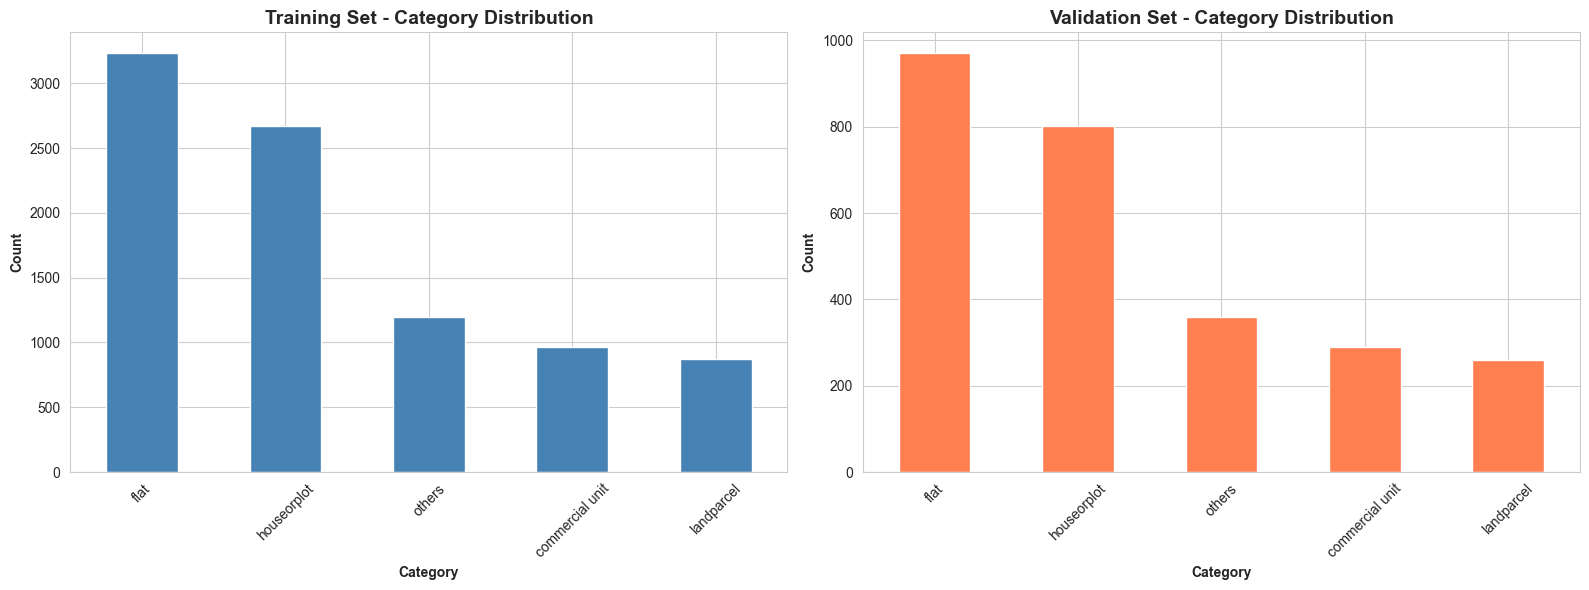


Class Imbalance Ratio: 3.72
⚠️  Dataset is imbalanced - consider using class_weight='balanced'


In [20]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set distribution
train_df['categories'].value_counts().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Training Set - Category Distribution', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Category', fontweight='bold')
axes[0].set_ylabel('Count', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Validation set distribution
val_df['categories'].value_counts().plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Validation Set - Category Distribution', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Category', fontweight='bold')
axes[1].set_ylabel('Count', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Check if classes are imbalanced
max_class = train_counts.max()
min_class = train_counts.min()
imbalance_ratio = max_class / min_class
print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}")
if imbalance_ratio > 3:
    print("⚠️  Dataset is imbalanced - consider using class_weight='balanced'")
else:
    print("✓ Dataset is relatively balanced")

## 5. Text Length Analysis

In [21]:
# Calculate text statistics
train_df['text_length'] = train_df['property_address'].astype(str).apply(len)
train_df['word_count'] = train_df['property_address'].astype(str).apply(lambda x: len(x.split()))

print("Text Length Statistics:")
print("=" * 80)
print(train_df[['text_length', 'word_count']].describe())

Text Length Statistics:
       text_length   word_count
count  8936.000000  8936.000000
mean    145.790063    20.987243
std      85.951123    14.295407
min       4.000000     1.000000
25%      95.000000    13.000000
50%     128.000000    17.000000
75%     166.000000    24.000000
max    1004.000000   168.000000


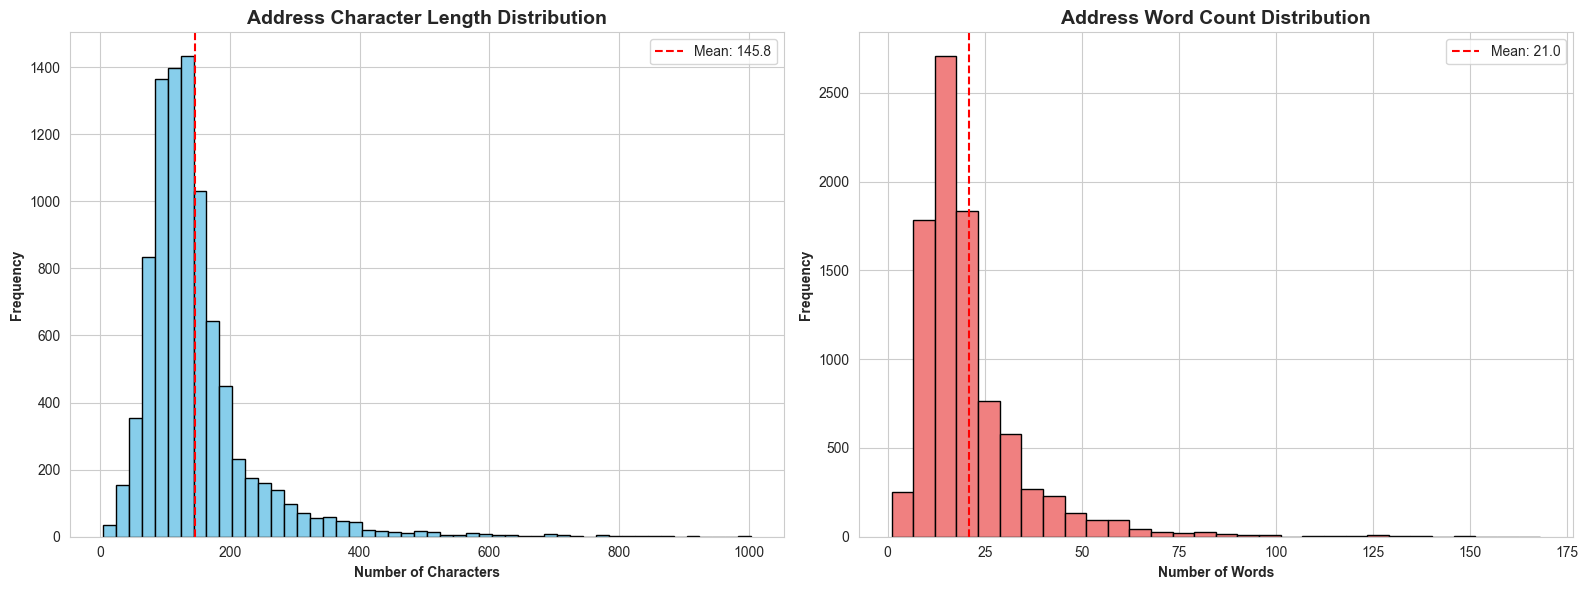

In [22]:
# Visualize text length distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Character length distribution
axes[0].hist(train_df['text_length'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Address Character Length Distribution', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Number of Characters', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].axvline(train_df['text_length'].mean(), color='red', linestyle='--', 
                label=f'Mean: {train_df["text_length"].mean():.1f}')
axes[0].legend()

# Word count distribution
axes[1].hist(train_df['word_count'], bins=30, color='lightcoral', edgecolor='black')
axes[1].set_title('Address Word Count Distribution', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Number of Words', fontweight='bold')
axes[1].set_ylabel('Frequency', fontweight='bold')
axes[1].axvline(train_df['word_count'].mean(), color='red', linestyle='--',
                label=f'Mean: {train_df["word_count"].mean():.1f}')
axes[1].legend()

plt.tight_layout()
plt.show()

Average Text Length by Category:
                       mean  median        std
categories                                    
commercial unit  159.466321   133.0  91.262697
flat             163.506807   142.0  92.806661
houseorplot      146.046390   129.0  80.162093
landparcel       117.119678    90.0  75.410364
others           107.169591   100.0  60.303085


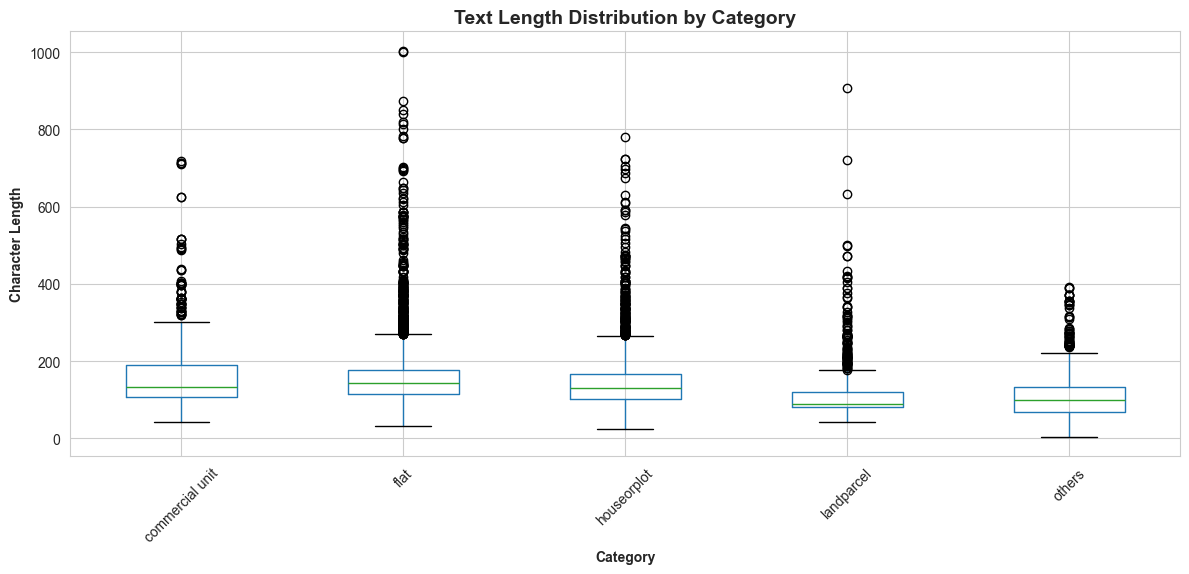

In [23]:
# Text length by category
print("Average Text Length by Category:")
print("=" * 80)
length_by_category = train_df.groupby('categories')['text_length'].agg(['mean', 'median', 'std'])
print(length_by_category)

# Visualize
train_df.boxplot(column='text_length', by='categories', figsize=(12, 6))
plt.suptitle('')
plt.title('Text Length Distribution by Category', fontweight='bold', fontsize=14)
plt.xlabel('Category', fontweight='bold')
plt.ylabel('Character Length', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Sample Addresses by Category

In [24]:
# Show sample addresses for each category
print("Sample Addresses by Category:")
print("=" * 80)

for category in train_df['categories'].unique():
    print(f"\n{category.upper()}:")
    print("-" * 80)
    samples = train_df[train_df['categories'] == category]['property_address'].head(5)
    for idx, addr in enumerate(samples, 1):
        print(f"{idx}. {addr}")

Sample Addresses by Category:

HOUSEORPLOT:
--------------------------------------------------------------------------------
1. New Ppid 1Kqttmg7, House, Property Id No.58C57U54 Having Land Measuring 200 Sq.Yd Situated At Vaka Jasico Colony, Jagadhri, And Distt. Yamunanagar Inside Mc Limits, Tehsil Jagadhri Near Mandir
2. Property Of Rs No.12/2,Plot No. 01,House Number.7/48 & 5/13, E-Swatthu 
 No:151500500900500801, Situated At Kotnoor(D) Village, Kalaburagi 
 Taluk, Dist.Kalaburagi . 585102.
3. Plot 61Sp, Jbs Nature Valley-4, Sy No 177,178,179,188,186,192,202,203, Gundrampally Village And Gramapanchayath, Chityal Mandal, Nalgonda Dist, Hyderabad, Telangana,
  India, 
  508001
4. H.No: 8-63/B, Nehru Nagar, Jankampet Village, Yedpally Mandal, Nizamabad Dist, Telangana - 503186
5. Property Plot No.160 Admeasuring 145 Sq. Mtrs., Part Of Khasra No.72., Situated At Pushpanjali Orchid (Pushpanjali Kings Street), Mauza Rajrai, Tehsil And District Agra-282001

FLAT:
---------------------------

## 7. Common Keywords Analysis

In [25]:
import re
from collections import Counter

def extract_keywords(text):
    """Extract keywords from text."""
    text = str(text).lower()
    # Remove special characters but keep numbers
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    words = text.split()
    # Filter out very short words
    words = [w for w in words if len(w) > 2]
    return words

# Extract keywords for each category
print("Top 10 Keywords by Category:")
print("=" * 80)

for category in train_df['categories'].unique():
    category_df = train_df[train_df['categories'] == category]
    all_words = []
    
    for addr in category_df['property_address']:
        all_words.extend(extract_keywords(addr))
    
    word_counts = Counter(all_words)
    top_words = word_counts.most_common(10)
    
    print(f"\n{category.upper()}:")
    for word, count in top_words:
        print(f"  {word:15s}: {count:4d}")

Top 10 Keywords by Category:

HOUSEORPLOT:
  plot           : 1742
  village        :  837
  house          :  771
  nagar          :  639
  and            :  572
  india          :  539
  road           :  489
  district       :  418
  situated       :  417
  pradesh        :  412

FLAT:
  floor          : 2552
  flat           : 2371
  plot           : 1114
  road           :  915
  maharashtra    :  768
  village        :  673
  and            :  591
  nagar          :  528
  block          :  499
  near           :  442

LANDPARCEL:
  near           :  352
  village        :  204
  khasra         :  199
  tehsil         :  162
  survey         :  156
  school         :  134
  and            :  116
  pargana        :  111
  road           :  109
  pradesh        :  105

OTHERS:
  unit           :  325
  road           :  311
  near           :  256
  village        :  244
  nagar          :  170
  property       :  165
  ward           :  137
  rajasthan      :  129
  gujarat       

## 8. Key Findings Summary

**Summary of EDA insights that will guide model development:**

In [26]:
print("="*80)
print("KEY FINDINGS & IMPLICATIONS")
print("="*80)

print("\n1. DATASET SIZE:")
print(f"   - Training samples: {len(train_df)}")
print(f"   - Validation samples: {len(val_df)}")
print(f"   - Total: {len(train_df) + len(val_df)}")

print("\n2. CLASS DISTRIBUTION:")
print(f"   - Number of categories: {train_df['categories'].nunique()}")
print(f"   - Imbalance ratio: {imbalance_ratio:.2f}")
if imbalance_ratio > 3:
    print("   - Action: Use class_weight='balanced' in models")
    print("   - Metric: Focus on Macro F1 score (not just accuracy)")

print("\n3. TEXT CHARACTERISTICS:")
print(f"   - Average address length: {train_df['text_length'].mean():.1f} characters")
print(f"   - Average word count: {train_df['word_count'].mean():.1f} words")
print(f"   - Addresses are relatively short → TF-IDF should work well")

print("\n4. MISSING DATA:")
missing_count = train_df.isnull().sum().sum()
print(f"   - Total missing values: {missing_count}")
if missing_count == 0:
    print("   - ✓ No missing data - good quality dataset")

print("\n5. RECOMMENDED APPROACH:")
print("   - Text preprocessing: lowercase, remove special chars, keep numbers")
print("   - Feature extraction: TF-IDF with unigrams and bigrams")
print("   - Baseline model: Logistic Regression with class_weight='balanced'")
print("   - Evaluation: Classification report + Confusion matrix")
print("   - Primary metric: Macro F1 Score")

print("\n" + "="*80)
print("Ready to proceed to modeling phase ✓")
print("="*80)

KEY FINDINGS & IMPLICATIONS

1. DATASET SIZE:
   - Training samples: 8936
   - Validation samples: 2681
   - Total: 11617

2. CLASS DISTRIBUTION:
   - Number of categories: 5
   - Imbalance ratio: 3.72
   - Action: Use class_weight='balanced' in models
   - Metric: Focus on Macro F1 score (not just accuracy)

3. TEXT CHARACTERISTICS:
   - Average address length: 145.8 characters
   - Average word count: 21.0 words
   - Addresses are relatively short → TF-IDF should work well

4. MISSING DATA:
   - Total missing values: 0
   - ✓ No missing data - good quality dataset

5. RECOMMENDED APPROACH:
   - Text preprocessing: lowercase, remove special chars, keep numbers
   - Feature extraction: TF-IDF with unigrams and bigrams
   - Baseline model: Logistic Regression with class_weight='balanced'
   - Evaluation: Classification report + Confusion matrix
   - Primary metric: Macro F1 Score

Ready to proceed to modeling phase ✓


---
## Next Steps

Proceed to **02_modeling.ipynb** for:
- Text preprocessing
- TF-IDF feature extraction
- Model training (Logistic Regression, SVM, etc.)
- Comprehensive evaluation